In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')  
plt.rcParams['axes.unicode_minus'] = False

import copy

from sklearn.linear_model import LinearRegression

# Data

학생 1인당 월평균 사교육비 (17개 시도별)

In [2]:
in_e = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_E.csv', encoding='cp949')
in_m = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_M.csv', encoding='cp949')
in_h = pd.read_csv('data/학교급_및_시도별__학생_1인당_월평균_사교육비_H.csv', encoding='cp949')

in_e = in_e.T.rename(columns=in_e.T.iloc[0]).drop(in_e.T.index[0]).drop(['시도별', '전 체'], axis=1)
in_m = in_m.T.rename(columns=in_m.T.iloc[0]).drop(in_m.T.index[0]).drop(['시도별', '전 체'], axis=1)
in_h = in_h.T.rename(columns=in_h.T.iloc[0]).drop(in_h.T.index[0]).drop(['시도별', '전 체'], axis=1)

in_e.index = in_e.index.astype(int)
in_e = in_e.astype('float')
in_m.index = in_m.index.astype(int)
in_m = in_m.astype('float')
in_h.index = in_h.index.astype(int)
in_h = in_h.astype('float')

In [3]:
in_e

,서 울,부 산,대 구,인 천,광 주,대 전,울 산,세 종,경 기,강 원,충 북,충 남,전 북,전 남,경 북,경 남,제 주
2014,30.0,20.1,22.1,20.4,23.6,26.1,21.2,18.4,24.5,16.1,20.4,21.7,17.9,16.3,20.3,20.6,21.8
2015,29.6,20.9,21.8,20.3,23.3,25.3,20.5,19.1,24.6,16.6,20.7,21.6,18.2,16.3,20.0,20.2,21.2
2016,29.9,23.7,25.4,23.5,22.6,25.3,23.6,24.2,25.9,18.6,20.6,19.2,19.5,14.5,21.6,20.4,22.8
2017,34.1,23.7,28.4,25.2,23.9,28.3,21.7,23.9,26.8,19.5,18.3,19.1,18.8,15.5,20.3,21.7,21.2
2018,36.5,24.1,27.7,24.5,25.2,24.0,25.1,26.2,28.2,18.9,22.5,17.7,19.6,19.1,20.4,22.3,21.5
2019,38.5,28.8,29.5,27.8,24.3,27.9,24.8,30.6,33.2,22.5,23.9,21.6,20.4,15.1,21.4,23.2,22.8
2020,35.1,21.1,21.3,24.3,26.3,22.7,19.7,24.5,23.5,20.9,19.0,16.4,18.5,16.0,16.5,20.2,25.2
2021,47.3,32.8,37.4,29.8,27.4,34.1,26.7,33.1,34.6,24.6,27.9,23.3,23.9,22.4,26.4,24.9,27.0
2022,53.6,35.1,40.4,35.1,31.0,37.0,35.4,37.7,40.1,28.8,30.0,25.9,26.6,25.1,28.4,28.6,28.5


In [4]:
in_e.to_csv('지역별_월평균_1인당_사교육비_초.csv')
in_m.to_csv('지역별_월평균_1인당_사교육비_중.csv')
in_h.to_csv('지역별_월평균_1인당_사교육비_고.csv')

지역별 학생 1인당 월 평균 사교육비 (일반교과)

In [5]:
df = pd.read_csv('data/지역별_학생_1인당_월평균_사교육비_20230809143756.csv', encoding='cp949', index_col=0)
df.columns = [x.replace(' ', '') for x in df.columns]
df.index.name = None

In [6]:
def divide_data(df, s):
    df_s = copy.deepcopy(df)
    target_col = s
    filtered = [col for col in df_s.columns if target_col in col]
    df_s = df_s[filtered]
    df_s = df_s.rename(columns = df_s[filtered].iloc[0]).drop(df_s.index[0])
    df_s.columns = [x.replace('(만원)', '') for x in df_s.columns]
    df_s.index = df_s.index.astype(int)
    df_s = df_s.astype('float')
    return df_s

In [7]:
kor = divide_data(df, '국어')
en = divide_data(df, '영어')
math = divide_data(df, '수학')
sosc = divide_data(df, '사회과학')
essay = divide_data(df, '논술')

indi = divide_data(df, '개인과외')
gro = divide_data(df, '그룹과외')
aca = divide_data(df, '학원수강')
visi = divide_data(df, '방문학습지')
inter = divide_data(df, '유료인터넷및통신강좌등')

In [8]:
subjects = ['국어', '영어', '수학', '사회과학', '논술']

for col in subjects:
    print(col)
    display(divide_data(df, col))

국어


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.5,3.1,2.0,2.1,2.2,1.6
2008,2.4,3.2,1.9,2.1,2.2,1.7
2009,2.4,3.1,2.0,2.0,2.1,1.7
2010,2.4,2.9,2.0,1.9,2.0,1.7
2011,2.1,2.7,1.7,1.7,1.7,1.5
2012,1.9,2.4,1.5,1.6,1.7,1.3
2013,1.8,2.3,1.5,1.5,1.5,1.4
2014,1.7,2.3,1.3,1.3,1.4,1.2
2015,1.7,2.3,1.3,1.3,1.4,1.0
2016,1.9,2.5,1.5,1.4,1.5,1.2


영어


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,7.6,8.8,6.8,6.1,7.1,3.0
2008,8.4,9.5,7.6,7.0,8.2,3.3
2009,8.8,10.8,7.4,7.5,8.5,4.6
2010,8.8,10.5,7.6,7.5,8.4,4.9
2011,8.8,10.8,7.4,7.5,8.5,4.9
2012,8.8,10.1,8.0,7.4,8.1,4.7
2013,9.4,11.3,8.1,7.2,8.2,4.3
2014,9.3,11.2,8.0,7.3,8.2,4.7
2015,9.1,11.2,7.7,7.2,7.9,4.8
2016,8.9,10.7,7.6,7.1,7.8,4.7


수학


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,6.7,7.9,5.8,5.0,5.6,2.8
2008,7.0,8.2,6.3,5.6,6.4,3.1
2009,7.7,9.1,6.7,5.9,6.8,3.6
2010,7.8,9.1,6.9,6.1,6.9,3.9
2011,8.1,9.6,7.0,6.3,7.1,4.0
2012,8.6,10.4,7.4,6.6,7.3,4.1
2013,8.7,10.4,7.5,6.5,7.2,4.3
2014,8.9,10.8,7.6,6.7,7.5,4.6
2015,8.8,10.6,7.5,6.9,7.4,5.0
2016,8.9,10.8,7.7,6.7,7.2,4.7


사회과학


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,1.7,1.9,1.6,1.5,1.7,1.1
2008,1.6,1.9,1.5,1.4,1.6,1.0
2009,1.7,2.1,1.5,1.5,1.6,1.3
2010,1.5,1.7,1.4,1.4,1.5,1.1
2011,1.4,1.7,1.2,1.2,1.2,1.2
2012,1.3,1.7,1.0,1.0,1.1,0.8
2013,1.0,1.1,0.9,0.9,0.9,0.8
2014,1.0,1.2,0.9,0.8,0.8,0.8
2015,1.0,1.3,0.9,0.8,0.9,0.7
2016,1.2,1.6,1.0,0.9,0.9,0.7


논술


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,1.0,1.2,0.8,0.7,0.8,0.3
2008,0.8,0.9,0.7,0.5,0.6,0.2
2009,0.7,0.9,0.6,0.5,0.6,0.4
2010,0.7,0.9,0.6,0.6,0.6,0.4
2011,0.8,1.0,0.6,0.6,0.7,0.4
2012,0.8,1.1,0.6,0.6,0.7,0.2
2013,0.9,1.3,0.7,0.6,0.7,0.3
2014,0.7,1.0,0.6,0.6,0.7,0.3
2015,0.8,1.1,0.6,0.6,0.7,0.3
2016,0.9,1.2,0.7,0.7,0.8,0.4


지역별 학생 1인당 월 평균 사교육비 (학습 방법)

In [9]:
how = ['개인과외', '그룹과외', '학원수강', '방문학습지', '유료인터넷및통신강좌등']

for col in how:
    print(col)
    display(divide_data(df, col))

개인과외


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,3.2,4.2,2.5,2.4,2.8,1.0
2008,3.3,4.3,2.6,2.5,3.0,1.2
2009,4.0,5.3,3.2,2.8,3.2,1.5
2010,3.9,4.9,3.1,2.7,3.1,1.6
2011,4.0,5.4,3.0,2.9,3.3,1.7
2012,4.0,4.8,3.5,2.8,3.2,1.6
2013,3.9,4.9,3.3,2.8,3.2,1.7
2014,4.0,4.8,3.6,2.7,3.0,1.7
2015,4.0,4.9,3.5,2.9,3.2,2.1
2016,3.7,4.2,3.3,2.7,2.9,2.0


그룹과외


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.1,2.1,2.1,1.8,2.1,1.0
2008,1.9,1.9,1.9,1.8,2.0,1.1
2009,2.1,2.0,2.1,2.1,2.3,1.7
2010,2.1,2.1,2.1,2.3,2.5,1.7
2011,2.1,2.2,2.1,2.2,2.3,1.8
2012,2.3,2.4,2.2,2.2,2.4,1.8
2013,2.2,2.1,2.2,2.1,2.4,1.5
2014,2.1,2.1,2.1,2.2,2.4,1.6
2015,2.2,2.2,2.2,2.2,2.3,1.9
2016,1.8,1.8,1.8,2.0,2.1,1.7


학원수강


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,12.6,14.9,11.0,9.5,10.8,5.4
2008,13.6,16.0,12.0,10.8,12.4,5.8
2009,13.7,17.1,11.4,11.0,12.5,7.1
2010,13.8,16.5,11.9,11.0,12.4,7.4
2011,13.9,17.0,11.8,11.0,12.4,7.2
2012,14.1,17.6,11.7,11.1,12.3,6.8
2013,14.8,18.5,12.3,10.7,11.9,7.1
2014,14.6,18.6,11.9,10.8,12.1,7.2
2015,14.3,18.4,11.5,10.7,11.8,6.9
2016,15.1,19.5,12.1,10.9,12.0,6.9


방문학습지


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.0,2.0,2.1,2.0,2.1,1.6
2008,1.8,1.8,1.9,1.8,1.8,1.4
2009,1.7,1.9,1.6,1.7,1.8,1.5
2010,1.5,1.7,1.4,1.6,1.6,1.4
2011,1.3,1.5,1.2,1.3,1.4,1.3
2012,1.1,1.1,1.1,1.1,1.1,1.0
2013,1.0,1.1,0.9,1.1,1.1,0.9
2014,1.0,1.1,0.9,1.1,1.1,1.0
2015,1.0,1.1,0.9,1.1,1.1,1.0
2016,1.0,1.0,1.0,1.1,1.1,1.0


유료인터넷및통신강좌등


,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,0.2,0.3,0.2,0.2,0.2,0.2
2008,0.3,0.3,0.2,0.2,0.3,0.2
2009,0.3,0.4,0.3,0.3,0.3,0.2
2010,0.3,0.3,0.3,0.3,0.3,0.2
2011,0.3,0.3,0.3,0.3,0.3,0.2
2012,0.2,0.2,0.3,0.2,0.3,0.2
2013,0.2,0.2,0.2,0.2,0.2,0.2
2014,0.2,0.2,0.2,0.2,0.2,0.2
2015,0.2,0.2,0.2,0.2,0.2,0.2
2016,0.5,0.5,0.4,0.4,0.4,0.4


전국 학원 수 2004-2022 (한국교육개발원, 교육통계연보)
- 세종시는 충청남도로 통합하여 진행

In [117]:
aca_cnt = pd.read_csv('data/사설학원수_행정구역별.csv', encoding='cp949', index_col=1)
aca_cnt.index.name = None
aca_cnt = aca_cnt.drop(index='시점',columns='성별(1)')
aca_cnt['세종특별자치시'] = aca_cnt['세종특별자치시'].replace('-', 0)
aca_cnt = aca_cnt.astype('float')
aca_cnt.index = aca_cnt.index.astype('int')
aca_cnt['충청남도'] = aca_cnt['세종특별자치시']+ aca_cnt['충청남도']
aca_cnt = aca_cnt.drop('세종특별자치시', axis=1)
aca_cnt

,전국,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2002,60206.0,11261.0,4070.0,2844.0,2791.0,2176.0,1773.0,2113.0,13072.0,2100.0,1868.0,2454.0,2894.0,2302.0,2789.0,4931.0,768.0
2003,63724.0,11176.0,4987.0,2978.0,2778.0,2646.0,1848.0,2257.0,13837.0,2146.0,1887.0,2460.0,2966.0,2387.0,2965.0,5646.0,760.0
2004,62764.0,11382.0,4842.0,2907.0,2766.0,2515.0,1745.0,2317.0,13806.0,2012.0,1834.0,2372.0,3155.0,2442.0,2919.0,4979.0,771.0
2005,64591.0,11603.0,4661.0,2908.0,2678.0,2667.0,1928.0,2316.0,14569.0,2139.0,2054.0,2419.0,3136.0,2519.0,3103.0,5053.0,838.0
2006,66841.0,11794.0,4709.0,3041.0,2652.0,2640.0,1982.0,2416.0,15529.0,2210.0,2154.0,2528.0,3084.0,2547.0,3317.0,5340.0,898.0
2007,67649.0,11549.0,4779.0,2929.0,2684.0,2420.0,2128.0,2346.0,15591.0,2315.0,2221.0,2660.0,3264.0,2637.0,3355.0,5844.0,927.0
2008,70329.0,12006.0,4751.0,2978.0,2879.0,2760.0,2134.0,2495.0,16566.0,2322.0,2276.0,2825.0,3313.0,2727.0,3306.0,6055.0,936.0
2009,72242.0,12086.0,4751.0,3435.0,2853.0,2211.0,2208.0,2649.0,17613.0,2393.0,2393.0,2902.0,3479.0,2829.0,3446.0,6059.0,935.0
2010,75952.0,13168.0,4860.0,3910.0,2924.0,2476.0,2218.0,2632.0,18146.0,2456.0,2489.0,3077.0,3842.0,2897.0,3572.0,6291.0,994.0
2011,76165.0,13477.0,5026.0,3746.0,2831.0,2281.0,2168.0,2600.0,18674.0,2474.0,2435.0,2944.0,3956.0,2891.0,3735.0,5970.0,957.0


In [206]:
hb = pd.read_csv('data/hb_loc.csv', index_col=0)
hb = hb.drop(columns=['0','1'], axis=1).drop_duplicates()
hb

,2
0,"전북 전주시 완산구 효천중앙로 57 (효자동2가, 모악빌딩)"
1,전북 전주시 완산구 효천서로 20
3,전북 전주시 완산구 봉곡로 132
4,"전북 전주시 완산구 호암로 75-11 (효자동2가, 7단지아파트상가)"
5,"전북 전주시 완산구 유연로 217-11 (효자동3가, 호반베르디움아파트 상가)"
...,...
2288,"서울 강남구 선릉로 8 (개포동, 래미안블레스티지)"
2290,충북 청주시 흥덕구 서현로 60
2292,서울 서대문구 증가로 150 (남가좌동)
2293,"전남 순천시 연동남길 39 (조례동, 서영옥머리마당)"


In [261]:
hb_region = [h.split(' ')[0] for h in hb['2']]
hb_region = [x.replace('경기도', '경기') for x in hb_region]
hb_region = [x.replace('대전광역시', '대전') for x in hb_region]
hb_region = [x.replace('서울특별시', '서울') for x in hb_region]
hb_region = [x.replace('부산광역시', '부산') for x in hb_region]
hb_region = [x.replace('대구광역시', '대구') for x in hb_region]
hb_region = [x.replace('강원특별자치도', '강원') for x in hb_region]
hb_region = [x.replace('세종특별자치시', '세종') for x in hb_region]
hb_region = [x.replace('제주특별자치도', '제주') for x in hb_region]
hb_region = pd.DataFrame(hb_region)
hb_region.value_counts()

경기    842
서울    382
경남    156
부산    153
경북    121
인천    112
대구     84
충남     66
전북     58
전남     55
충북     49
강원     48
광주     46
대전     35
세종     24
울산     16
제주     15
dtype: int64

In [277]:
hb_region[0]

0       전북
1       전북
2       전북
3       전북
4       전북
        ..
2257    서울
2258    충북
2259    서울
2260    전남
2261    서울
Name: 0, Length: 2262, dtype: object

Text(0.5, 1.0, 'Counts of Haebub Academy in Korea')

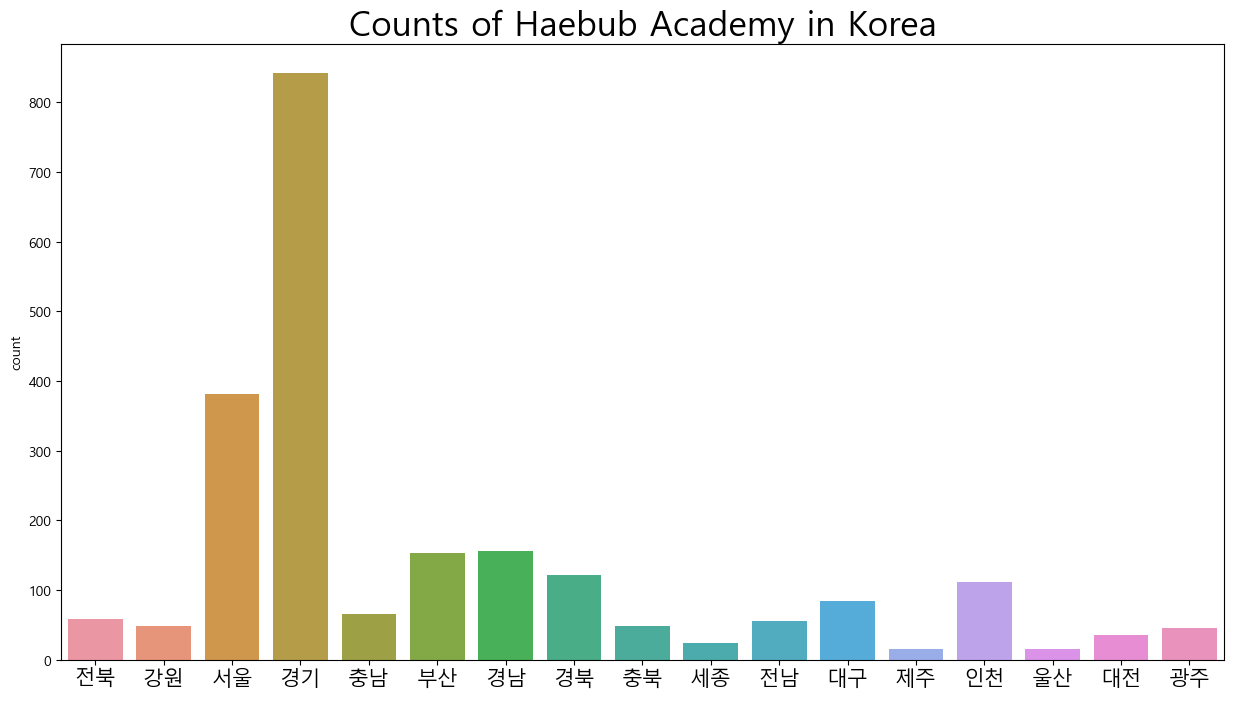

In [286]:
plt.figure(figsize=(15,8))
sns.countplot(x=hb_region[0])
plt.xticks(fontsize=15)
plt.xlabel(' ')
plt.title('Counts of Haebub Academy in Korea', fontsize=25)

# Regplot

학생 1인당 월평균 초, 중, 고 사교육비 (17개 시도별)

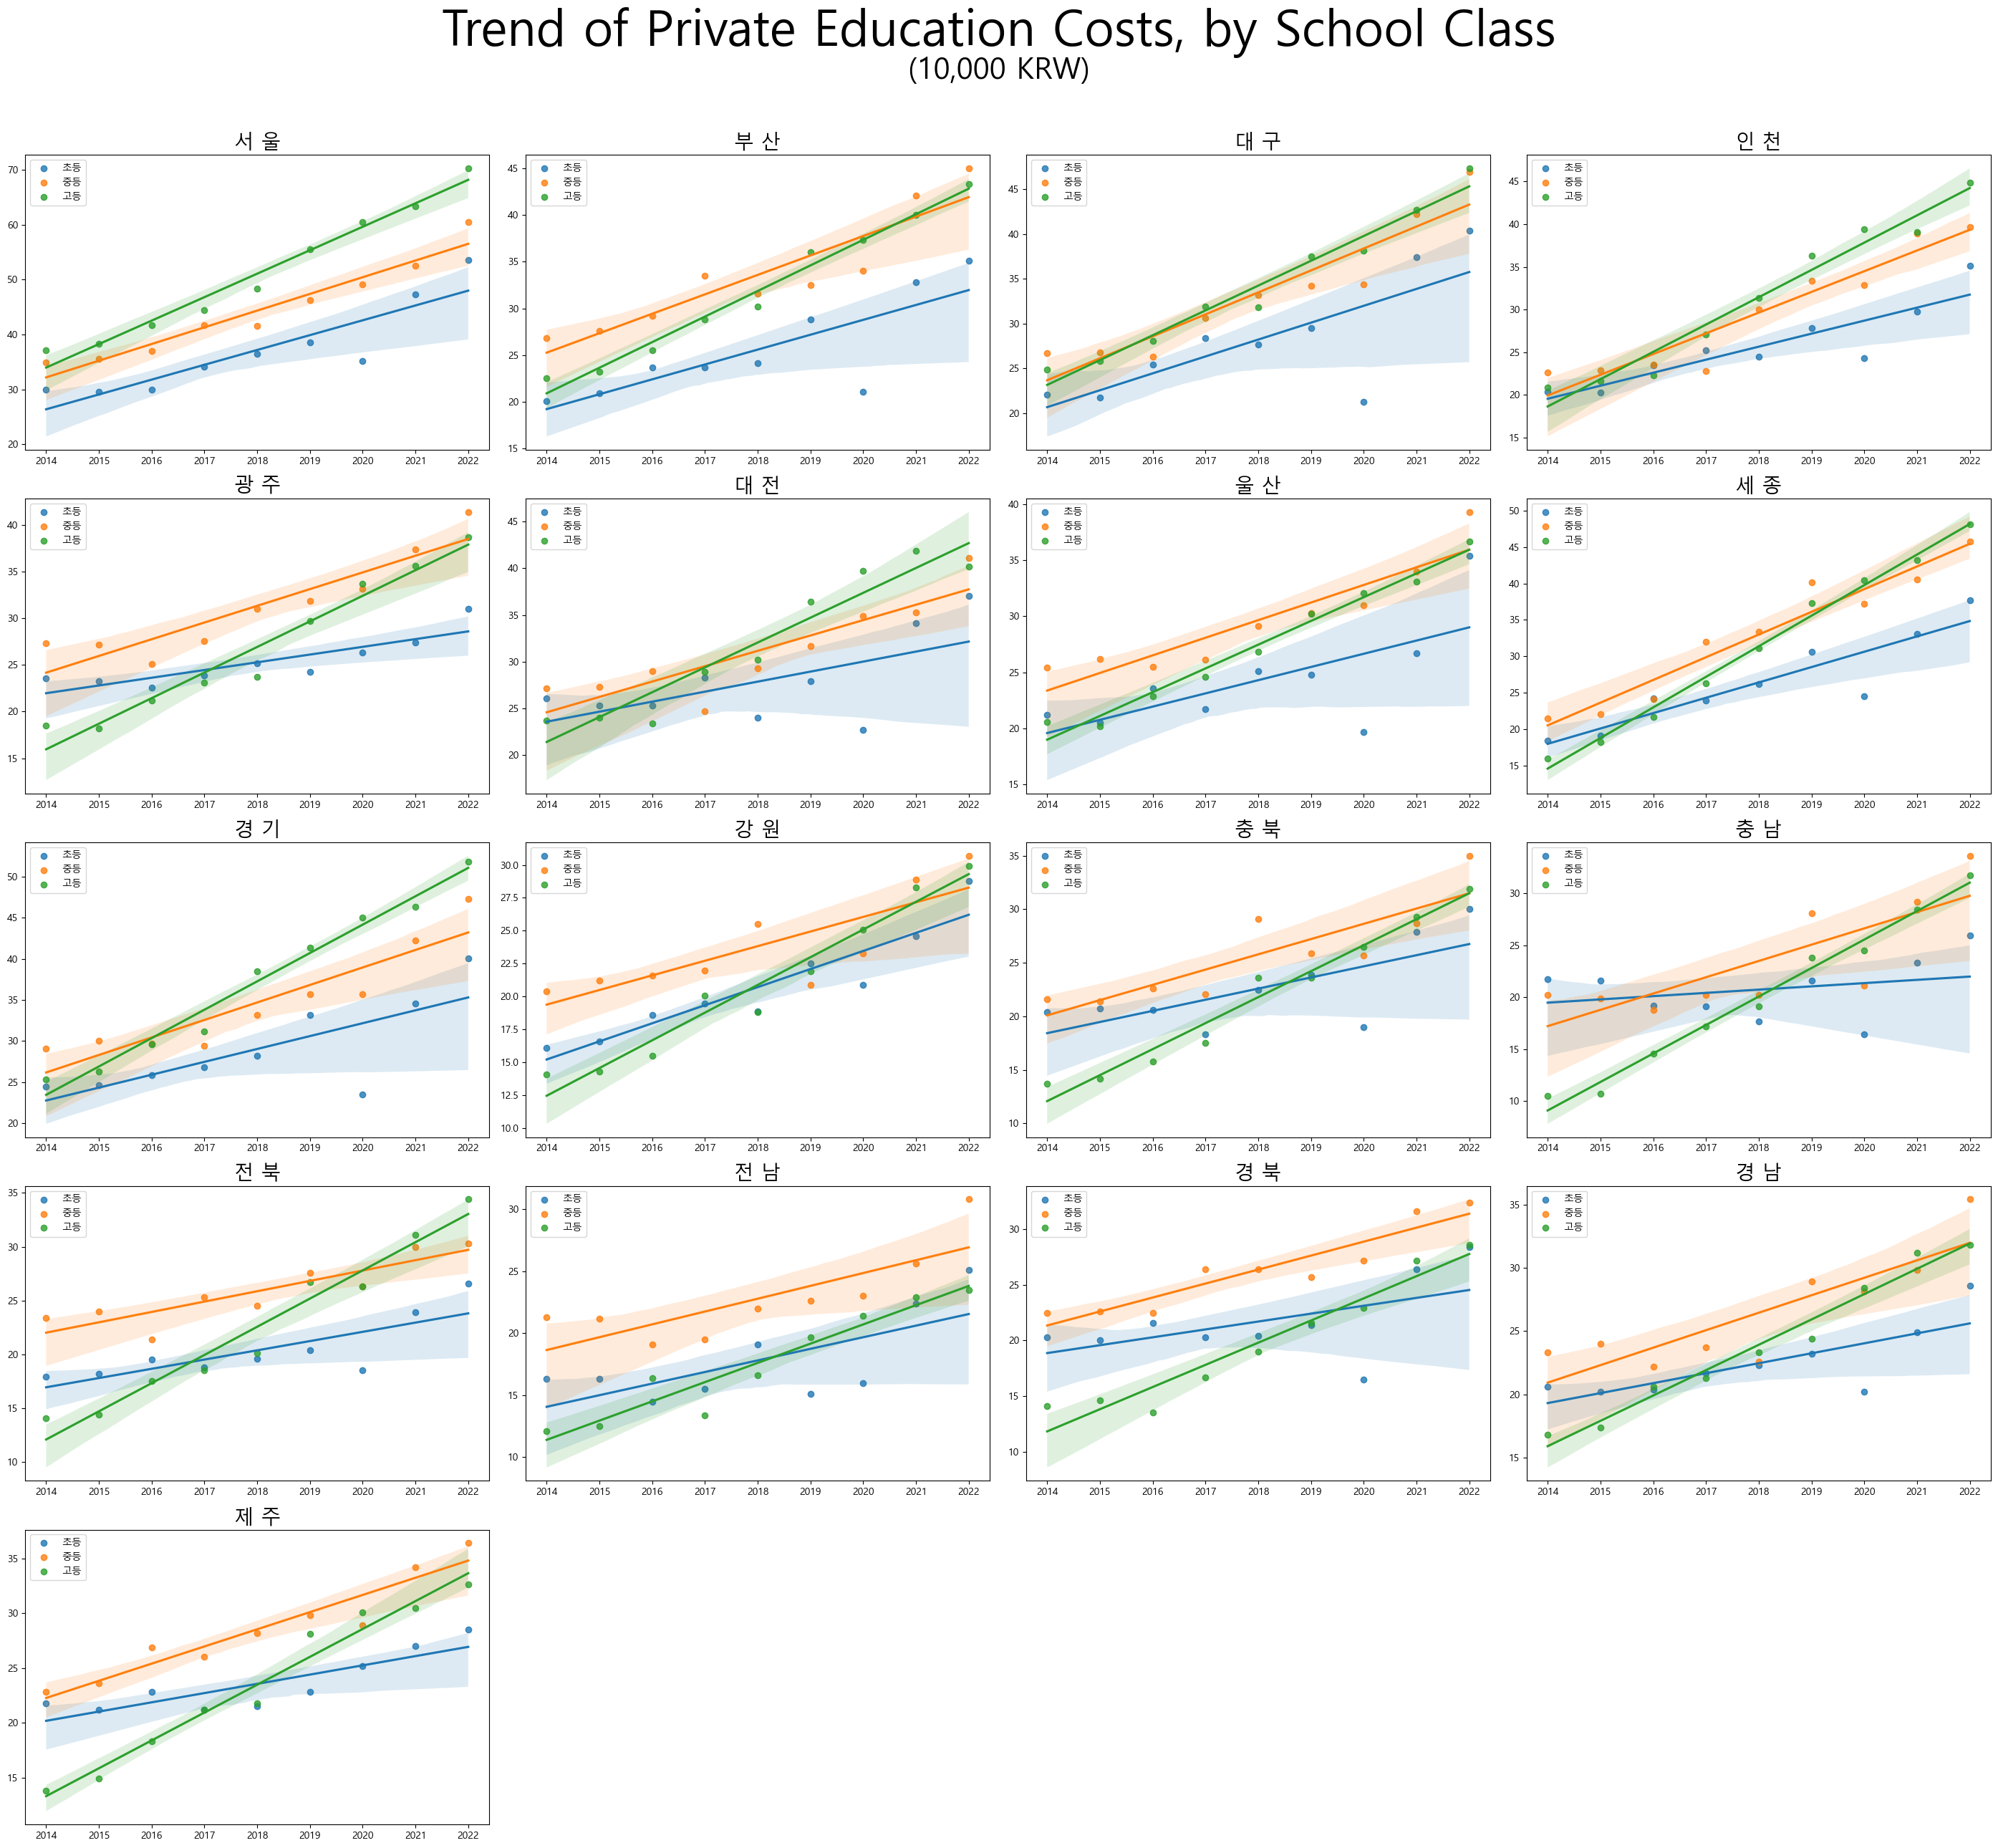

In [186]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(in_e.columns)), in_e.columns):
    plt.subplot(5, 4, i+1)
    sns.regplot(x=in_e.index , y=in_e[j], label='초등')
    sns.regplot(x=in_m.index , y=in_m[j], label='중등')
    sns.regplot(x=in_h.index , y=in_h[j], label='고등')
    plt.ylabel('')
    plt.legend(loc='upper left')
    plt.title(j, fontsize=20)
fig.suptitle("Trend of Private Education Costs, by School Class", fontsize=50, position=(0.5, 1.03))
fig.text(0.5, 0.99, "(10,000 KRW)", horizontalalignment="center", fontsize=30)
fig.tight_layout()
plt.show()

지역별 학생 1인당 월 평균 사교육비 (일반교과)

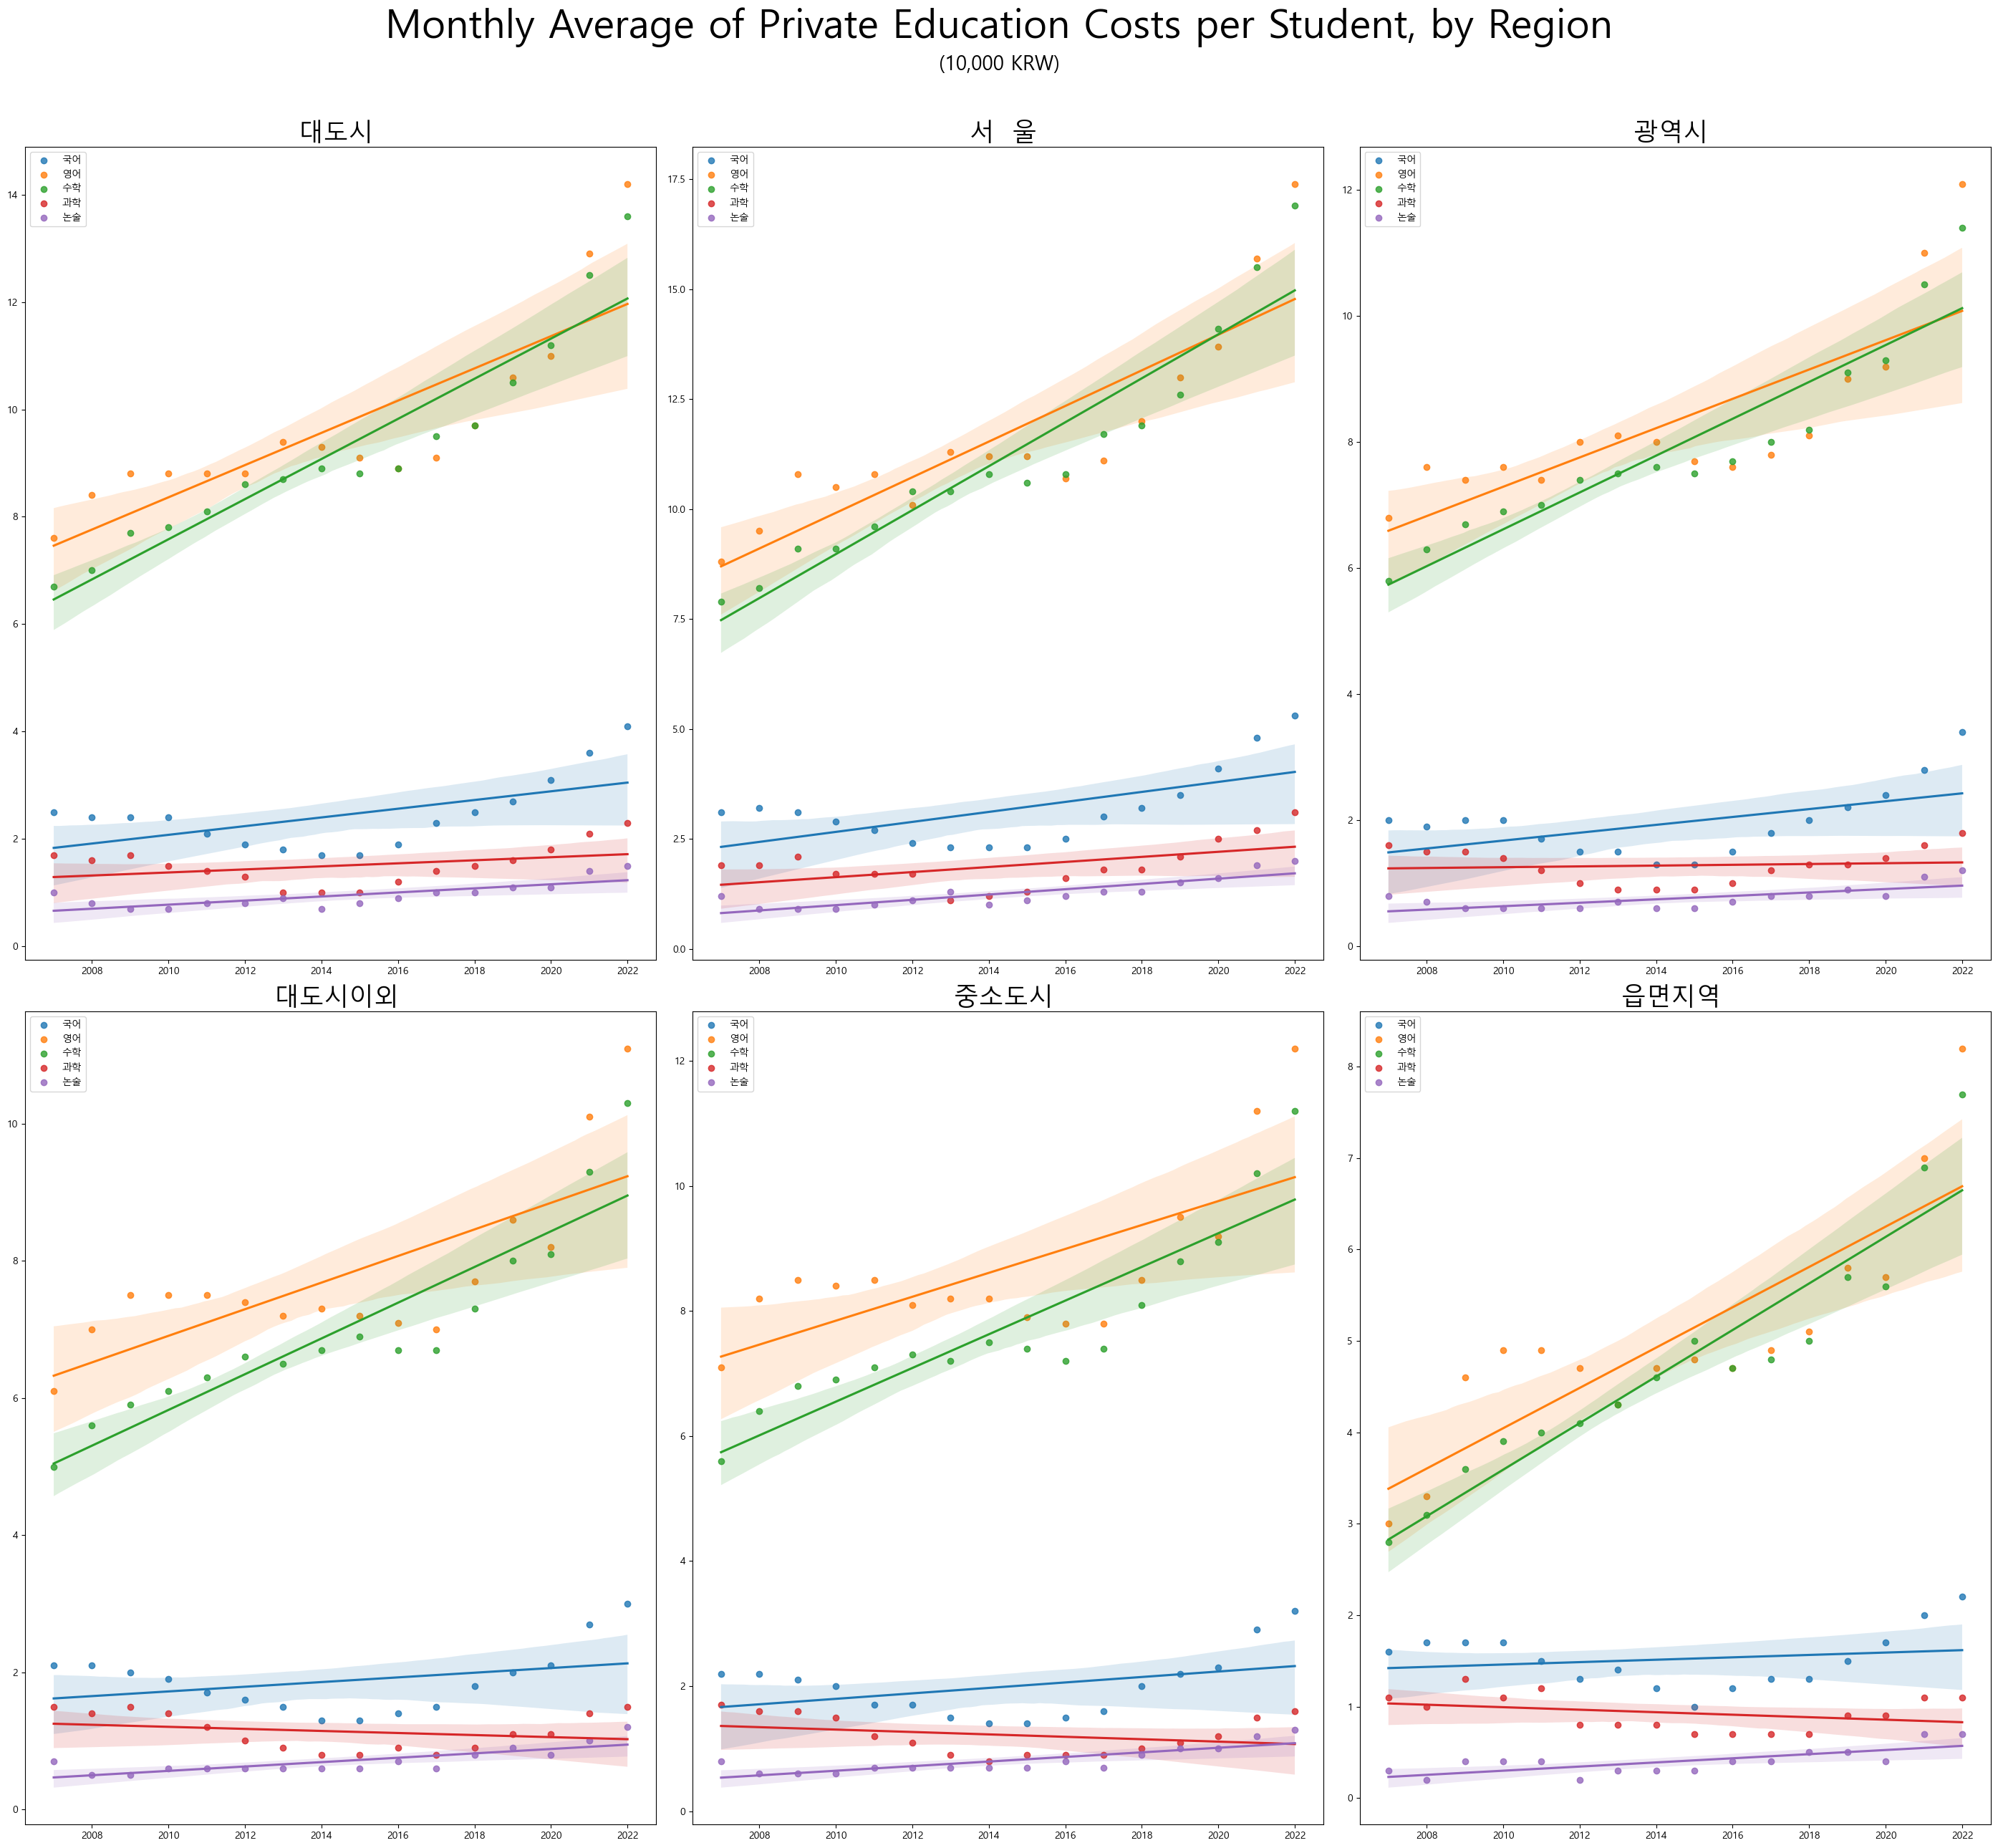

In [29]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(kor.columns)), kor.columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=kor.index , y=kor[j], label='국어')
    sns.regplot(x=en.index , y=en[j], label='영어')
    sns.regplot(x=math.index , y=math[j], label='수학')
    sns.regplot(x=sosc.index , y=sosc[j], label='과학')
    sns.regplot(x=essay.index , y=essay[j], label='논술')
    plt.ylabel('')
    plt.legend(loc='upper left')
    plt.title(j, fontsize=25)
fig.suptitle("Monthly Average of Private Education Costs per Student, by Region", fontsize=40, position=(0.5, 1.03))
fig.text(0.5, 0.995, "(10,000 KRW)", horizontalalignment="center", fontsize=20)
# fig.text(0.5, 0.985, "국어, 영어, 수학, 사회 과학, 논술", horizontalalignment="center", fontsize=25)
fig.tight_layout()
plt.show()

지역별 학생 1인당 월 평균 사교육비 (학습 방법)

In [110]:
kor

,대도시,서 울,광역시,대도시이외,중소도시,읍면지역
2007,2.5,3.1,2.0,2.1,2.2,1.6
2008,2.4,3.2,1.9,2.1,2.2,1.7
2009,2.4,3.1,2.0,2.0,2.1,1.7
2010,2.4,2.9,2.0,1.9,2.0,1.7
2011,2.1,2.7,1.7,1.7,1.7,1.5
2012,1.9,2.4,1.5,1.6,1.7,1.3
2013,1.8,2.3,1.5,1.5,1.5,1.4
2014,1.7,2.3,1.3,1.3,1.4,1.2
2015,1.7,2.3,1.3,1.3,1.4,1.0
2016,1.9,2.5,1.5,1.4,1.5,1.2


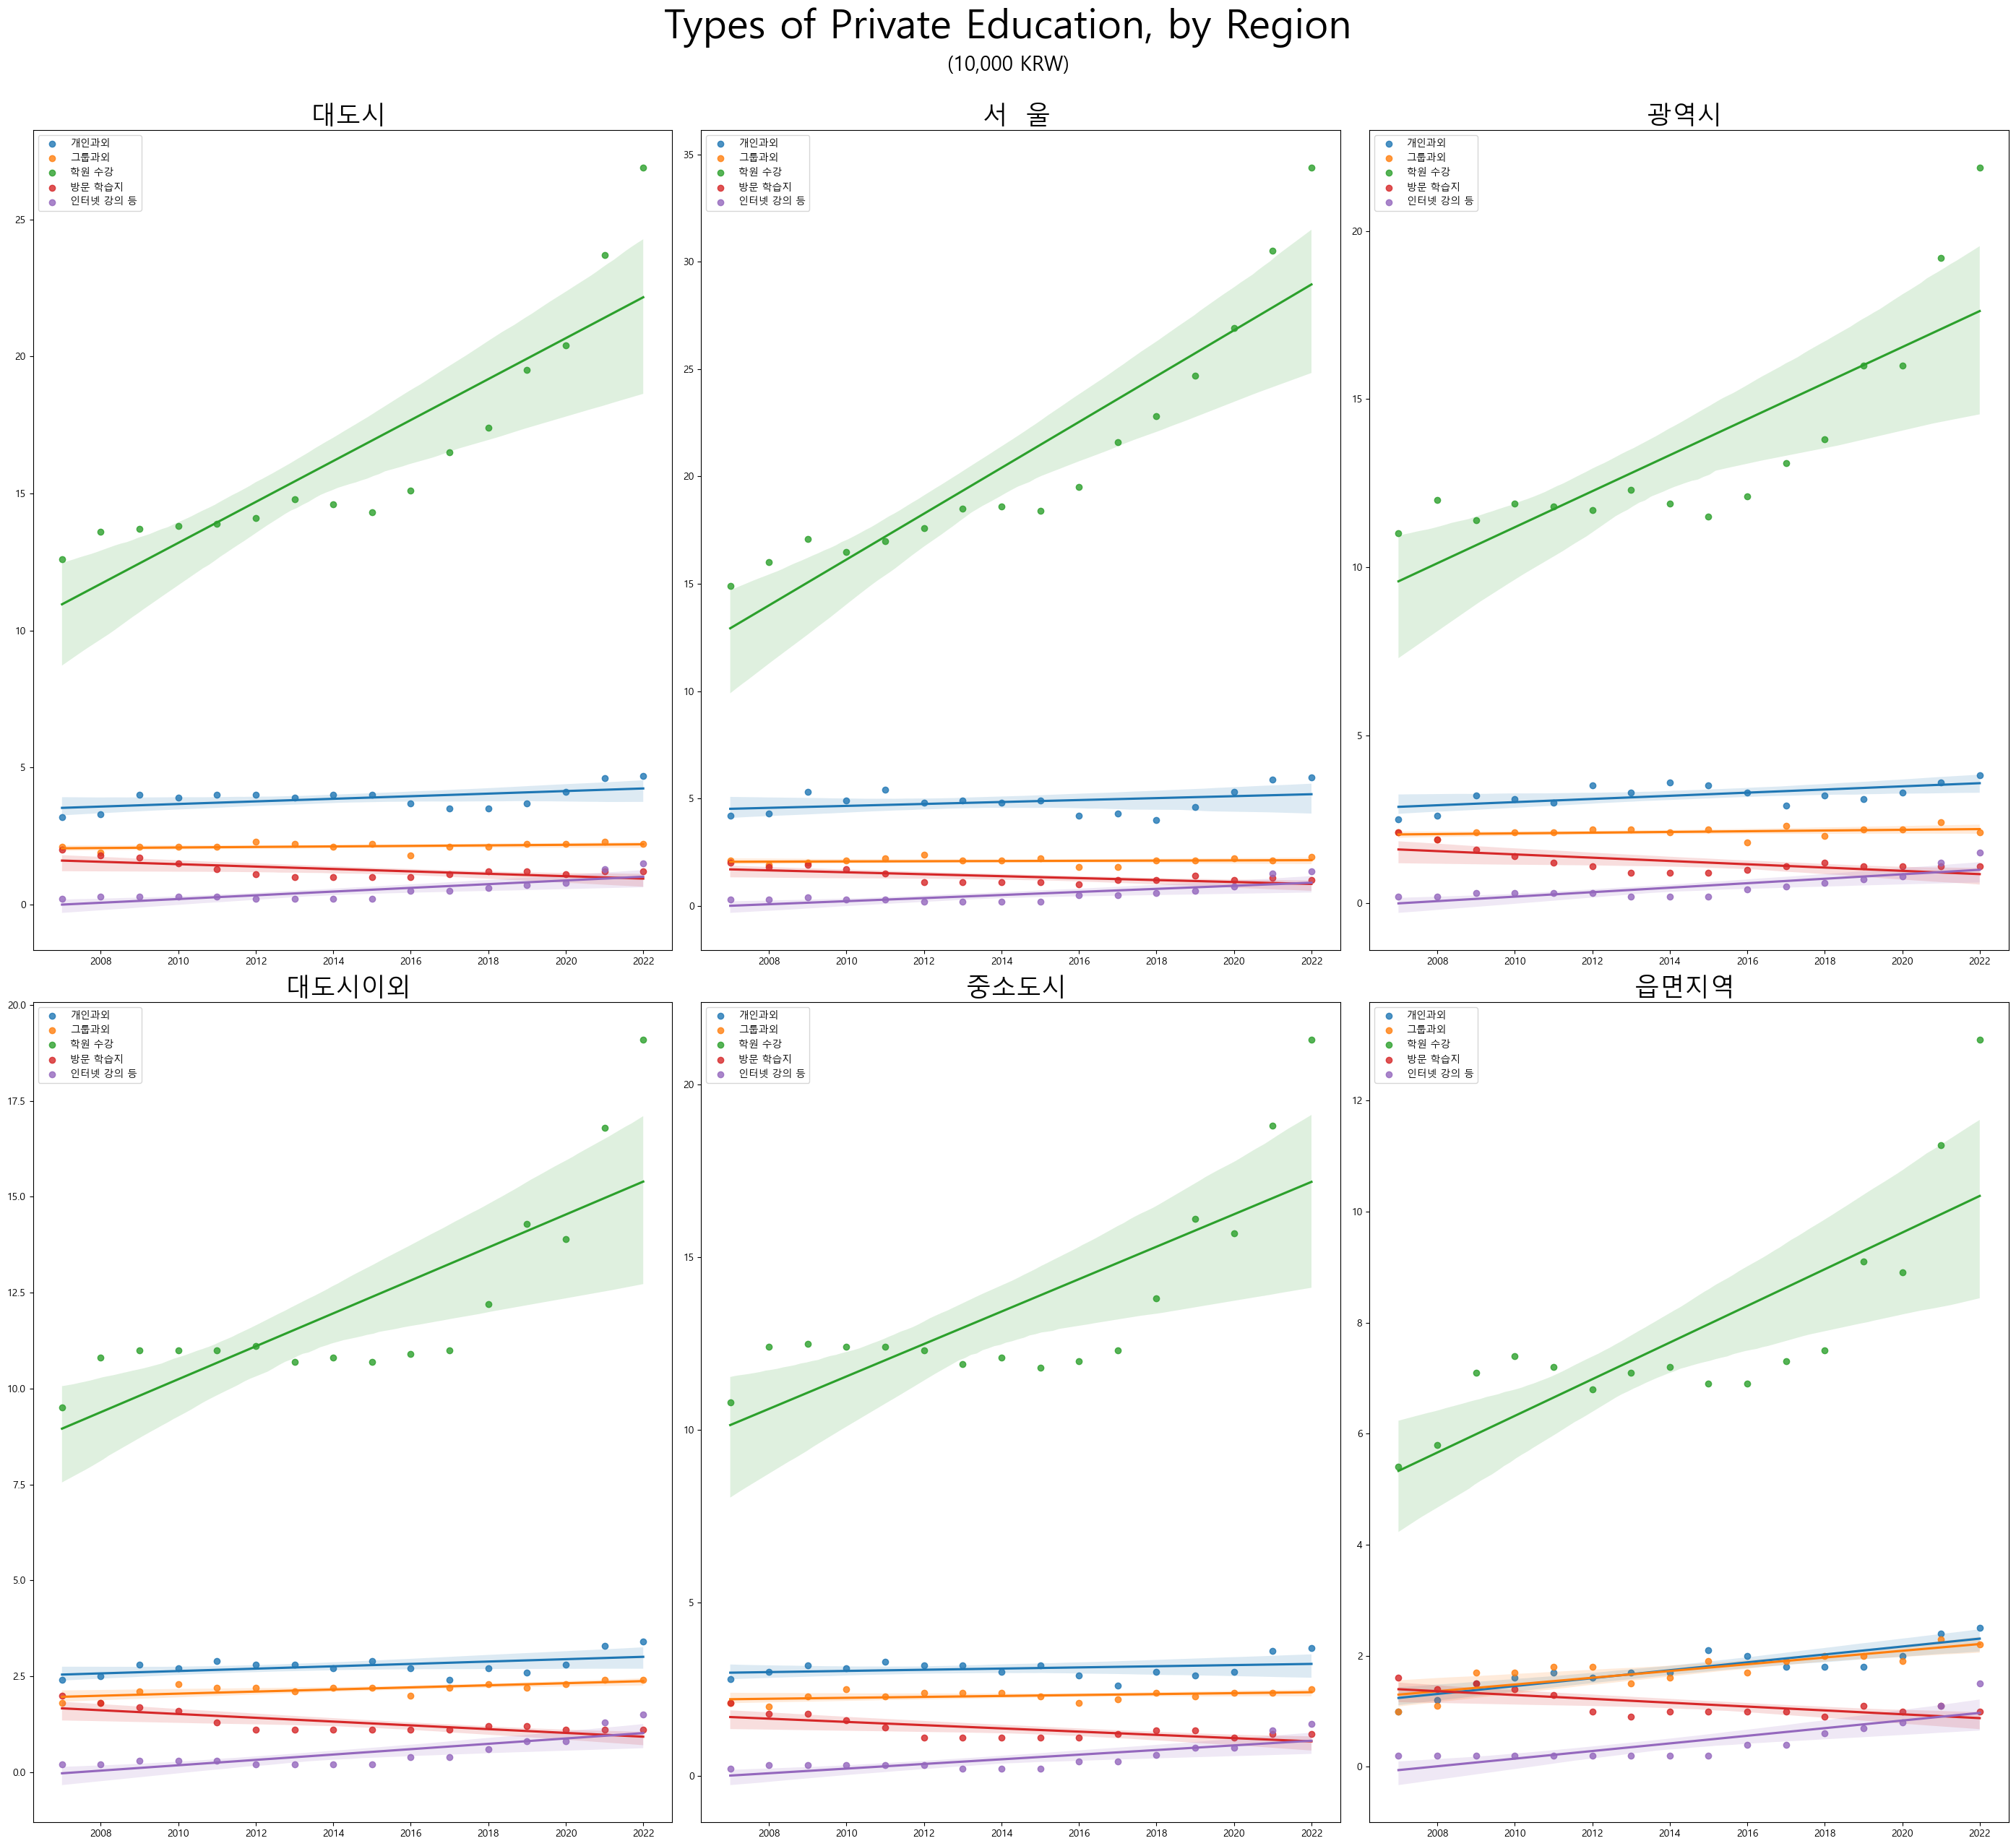

In [40]:
fig = plt.figure(figsize=(28,25))
for i, j in zip(range(len(kor.columns)), kor.columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=indi.index , y=indi[j], label='개인과외')  
    sns.regplot(x=gro.index , y=gro[j], label='그룹과외')    
    sns.regplot(x=aca.index , y=aca[j], label='학원 수강')
    sns.regplot(x=visi.index , y=visi[j], label='방문 학습지')  
    sns.regplot(x=inter.index , y=inter[j], label='인터넷 강의 등')
    plt.ylabel('')
    plt.legend()
    plt.title(j, fontsize=25)
fig.suptitle("Types of Private Education, by Region", fontsize=40, position=(0.5, 1.02))
fig.text(0.5, 0.985, "(10,000 KRW)", horizontalalignment="center", fontsize=20)
# fig.text(0.5, 0.985, "< 개인 과외, 그룹 과외, 학원 수강, 방문 학습지, 유료 인터넷 및 통신 강좌>", horizontalalignment="center", fontsize=25)
fig.tight_layout()
plt.show()

학원 수  추세

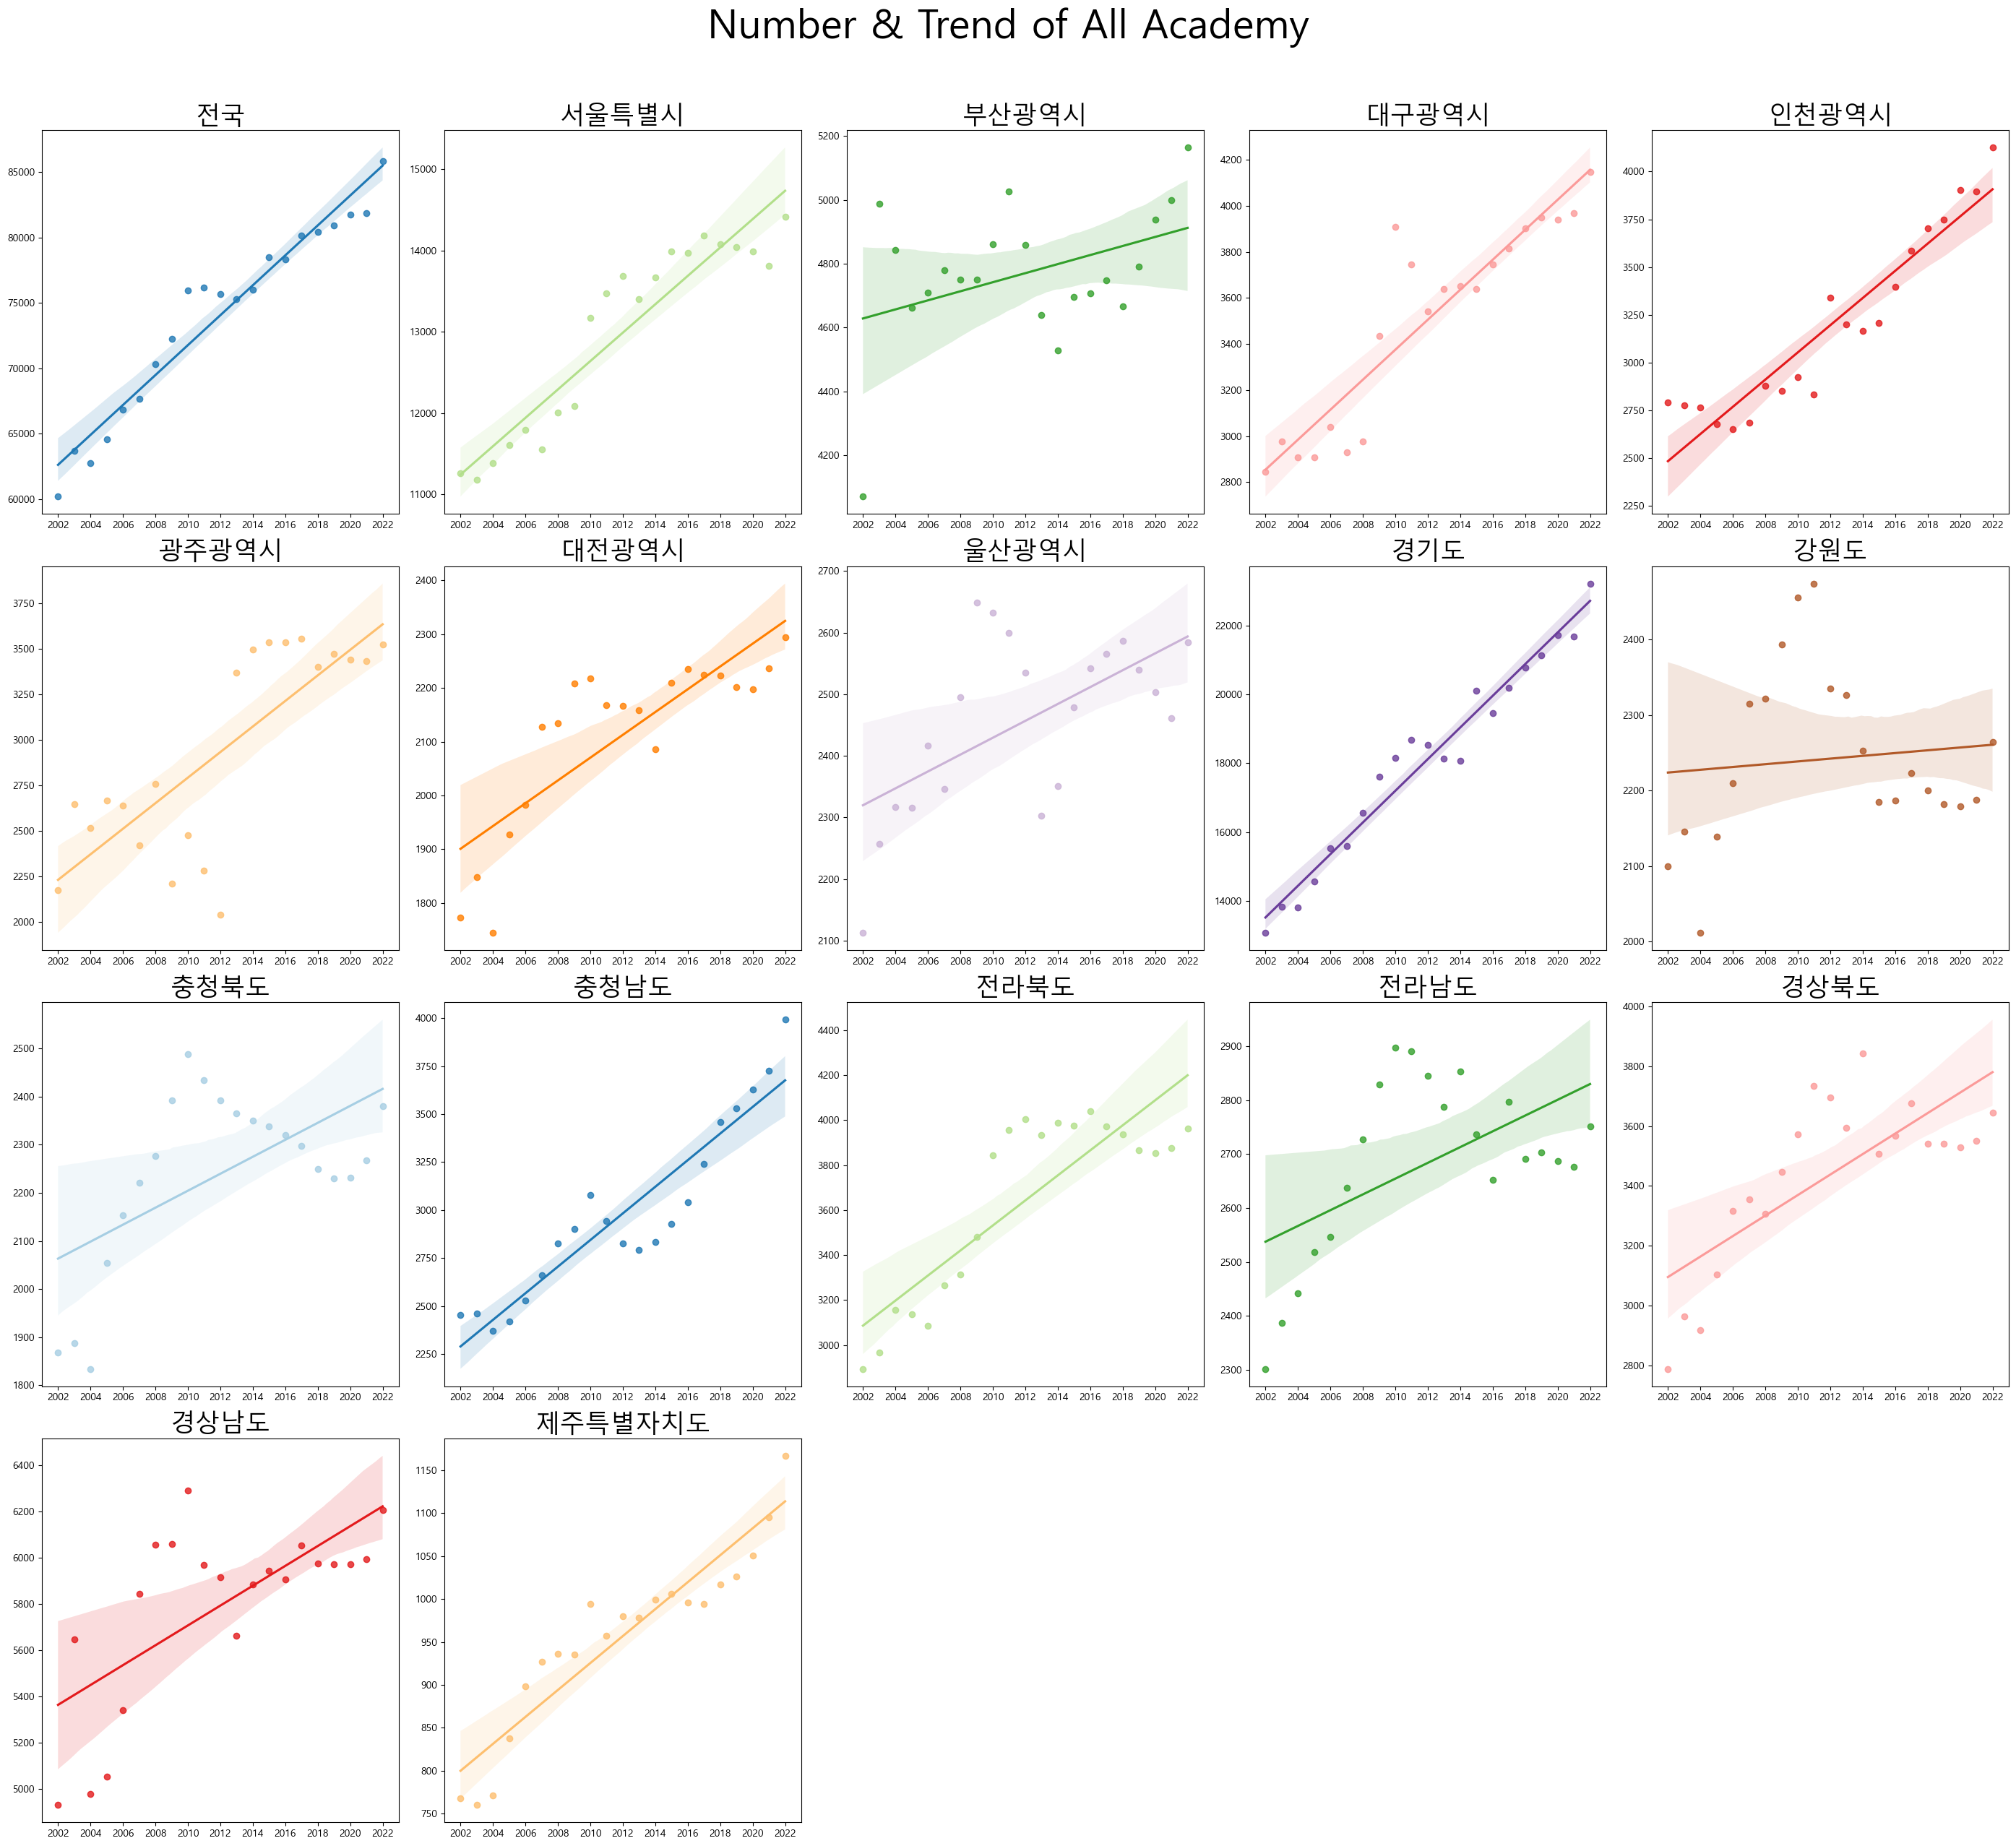

In [287]:
fig = plt.figure(figsize=(28,25))
palette = sns.color_palette("Paired")
c = 0 
for i, j in zip(range(len(aca_cnt.columns)), aca_cnt.columns):
    c += 1
    if c >= 12:
        c = 0
    elif c == 10:
        c += 1
    plt.subplot(4, 5, i+1)
    sns.regplot(x=aca_cnt.index, y=aca_cnt[j], color = palette[c])
    plt.ylabel('')
    plt.title(j, fontsize=25)
    plt.xticks(range(2002, 2023, 2))
fig.suptitle("Number & Trend of All Academy", fontsize=40, position=(0.5, 1.02))
fig.tight_layout()
plt.show()

## Scatter 3D

# Modeling

## Linear Regression